<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.shape

(14999, 10)

In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
# Target Variable
df['left'].unique()

array([1, 0], dtype=int64)

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='salary', ylabel='left'>

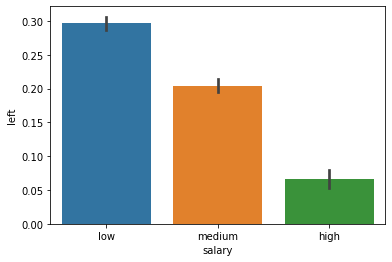

In [13]:
sns.barplot(data=df,x='salary',y='left')

<AxesSubplot:xlabel='Department', ylabel='left'>

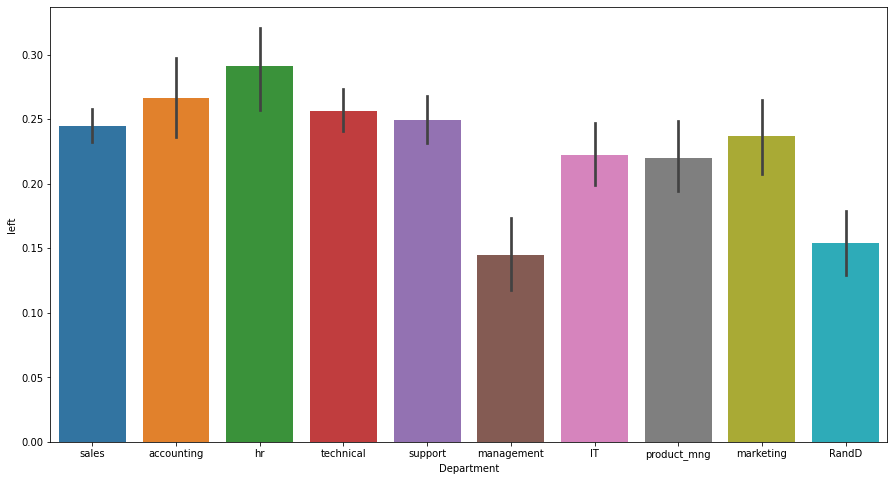

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=df,x='Department',y='left')

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
x=df.drop(['left'],axis=1)

In [17]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [18]:
x.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [19]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [20]:
# Handling Categorical Data
dumm=pd.get_dummies(x.salary,prefix='Salary')

In [21]:
dumm.head()

,Salary_high,Salary_low,Salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [22]:
x=pd.concat([x,dumm],axis=1)

In [23]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Salary_high,Salary_low,Salary_medium
0,0.38,0.53,2,157,3,0,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,0,sales,low,0,1,0


In [24]:
x.drop(['salary','Department'],axis=True,inplace=True)

In [25]:
x.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Salary_high                uint8
Salary_low                 uint8
Salary_medium              uint8
dtype: object

In [26]:
y=df['left']

In [27]:
x.shape

(14999, 10)

In [28]:
y.shape

(14999,)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=2)

In [31]:
print("x_train shape :",x_train.shape)
print("x_train shape :",x_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

x_train shape : (4499, 10)
x_train shape : (10500, 10)
y_train shape : (4499,)
y_test shape : (10500,)


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model=LogisticRegression()

In [34]:
model.fit(x_train,y_train)

c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
model.score(x_train,y_train)

0.7828406312513893

In [36]:
model.score(x_test,y_test)

0.7664761904761904

In [38]:
model.coef_

array([[-3.96248825,  0.697896  , -0.26989509,  0.00443125,  0.25802349,
        -1.51136524, -0.85840275, -1.14334499,  0.61614687,  0.1407892 ]])

In [120]:
model.intercept_

array([-0.46291693])

In [40]:
predicted_y=model.predict(x_test)
predicted_y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_y)
cm

array([[7388,  556],
       [1896,  660]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7944
           1       0.54      0.26      0.35      2556

    accuracy                           0.77     10500
   macro avg       0.67      0.59      0.60     10500
weighted avg       0.73      0.77      0.73     10500

